In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Interaction Effect (Synergy Effect)
- Assumption: two independent variables $x_1\ and\ x_2$ and one dependent variable $(y)$
- The interaction effect also known as synergy effect lets us know the combined effect of multiple variables $x's$ on the $y$
- To know the interaction effect of multiple features over the output label, we multiply the features as $x_1\times x_2$
- And calculate the coefficient as:
$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3(x_1.x_2) + \epsilon$$
    - here, $\beta_3$ provides synergy effect between the variables $x_1\ and\ x_2$
#### Example:
- In the advertising dataset the interaction effect can be analyzed by a beta coefficient of the product between multple features to examine whether it will be effective to advertise in only one or two or three variables such that it will generate maximum sales 

# Higher Order Relationship
- Assumption: independent variable $(x)$ and dependent variable $(y)$
- If the relationship between the $x\ and\ y$ is not linear we can engineer $x$ to higher order
- For example, we can generate quadratic and cubic relationship as following:
    - Calculating $x^2\ and\ x^3$ from $x$
    - Quadratic Model: $y=\beta_0 + \beta_1x + \beta_2x^2 + \epsilon$
    - Cubic Model : $y=\beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + \epsilon$

### Scikit-learn Preprocessing library
- sklearn preprocessing library contains tools to apply to the original data before training a model
- The tool called `PolynomialFeatures` contains both higher order feature polynomials and interaction terms
- The feature created includes:
    1. The bias (the value of 1.0)
    2. values raised to the power of degrees (i.e $x^2, x^3, ...$)
    3. interactions between all pairs of features. (i.e $x_1x_2, x_1x_3 .....$)
- Generalized term, if a data set has features $x_1\ and\ x_2$
    - 1, $x_1$, $x_2$,$x_1^2$, $x_1 \times x_2$, $x_2^2$

In [2]:
df = pd.read_csv('Advertising.csv')
df.drop(labels = 'Unnamed: 0', axis = 1, inplace=True)

In [3]:
X = df.drop(labels = 'sales', axis = 1)
y = df['sales']

In [4]:
# for train-test split of the given dataset
from sklearn.model_selection import train_test_split
# for model training using Linear Regression 
from sklearn.linear_model import LinearRegression
# for higherorder relations and interaction effect
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly_convertor= PolynomialFeatures(degree= 2, include_bias=False)
poly_fit = poly_convertor.fit(X)
polyfeatures = poly_fit.transform(X)
# The polyfit and polyTransform can be done in one step
# polyfeatures = poly_convertor.fit_transform(X)

- It is possible to fit one set of data and trainsform it to other, if both are identical dataset, unless we are transforming other to fit on another we can do it in single with method `fit_transform(X)`

- The polyfit and polyTransform can be done in a single line.
- the polyfit returns an object on which we can transform original features to polyfeatures those containing original features, interaction effect features and polynomial features of defined degree

In [6]:
polyfeatures.shape

(200, 9)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(polyfeatures,y,test_size=0.3, random_state = 101)

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train,y_train)

LinearRegression()

In [10]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [11]:
model.score(X_train, y_train)

0.9868638137712757

In [12]:
model.score(X_test, y_test)

0.9843529333146783

In [13]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [14]:
train_residuals = y_train - train_predictions
test_residuals = y_test - test_predictions
train_MSE = ((train_residuals**2).sum())/len(train_residuals)
test_MSE = ((test_residuals**2).sum())/len(test_residuals)

In [15]:
train_MSE, test_MSE

(np.float64(0.3456939142443999), np.float64(0.4417505510403753))

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mean_squared_error(y_train, train_predictions)

np.float64(0.3456939142443999)

In [18]:
mean_squared_error(y_test, test_predictions)

np.float64(0.4417505510403753)

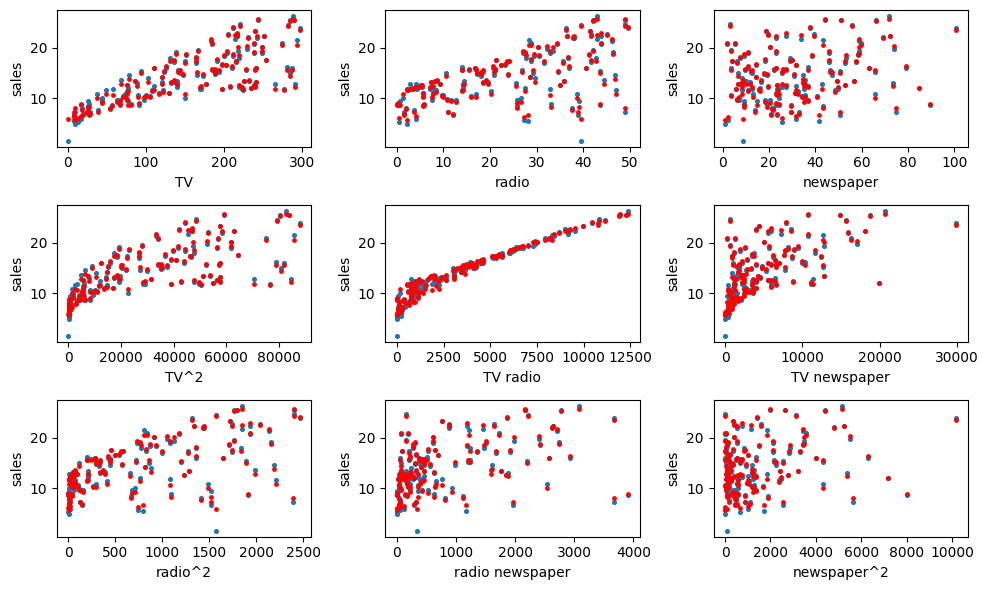

In [19]:
X_train_df = pd.DataFrame(X_train)
y_hat_train = train_predictions.reshape((len(train_predictions),1))
y_train_reshaped = y_train.values.reshape((len(y_train),1))
columns_X_train = poly_fit.get_feature_names_out(['TV','radio','newspaper'])

fig, ax = plt.subplots(3,3, figsize = (10,6))
for index,features in enumerate(X_train_df):
    ax[index//3, index%3].scatter(X_train_df[features], y_train, s = 7)
    ax[index//3, index%3].scatter(X_train_df[features], train_predictions, c = 'red', s=6)
    ax[index//3, index%3].set_xlabel(columns_X_train[index])
    ax[index//3, index%3].set_ylabel('sales')

fig.tight_layout()
    

In [20]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [21]:
columns_X_train

array(['TV', 'radio', 'newspaper', 'TV^2', 'TV radio', 'TV newspaper',
       'radio^2', 'radio newspaper', 'newspaper^2'], dtype=object)

- It is important to safely keet the `model` and `poly_convertor` as we may need to predict unseen data

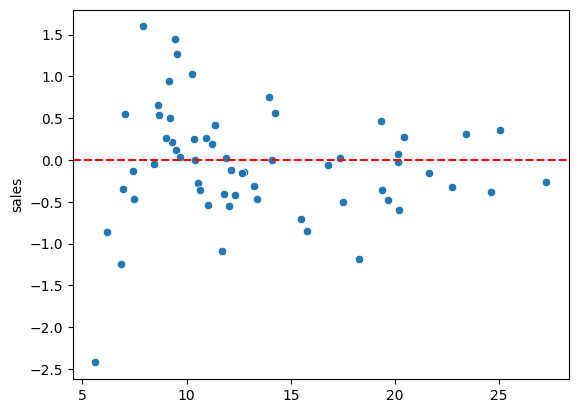

In [22]:
sns.scatterplot(x = test_predictions , y = test_residuals)
plt.axhline(y=0, c='red', ls='--')

### My Conclusion from the analysis (not certain)
- For me the test_MSE > train_MSE --> overfitted --> model rejection
- The residual vs prediction plot forms a funnel shape --> model rejection

> This was a first practice for the polynomial regression and may not be all perfect
> we can go beyond just 2 degree of polynomial, but in this case just 2nd degree also seems to be overfitted
> so i concluded the model is not best suit for the dataset.
> Lets see what happens in future videos(pierian, regression)

# GOTO CHECK BIAS VARIANCE TRADE-OFF